<a href="https://colab.research.google.com/github/zakirovde/netology_dz/blob/master/dogs_cats_pretr_false.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
torch.cuda.is_available()

True

In [0]:
import os
import numpy as np
os.mkdir('dogs_vs_cats')

!wget -x --load-cookies cookies.txt 'https://www.kaggle.com/c/5441/download-all' -O data.zip
!unzip data.zip
!unzip test.zip -d './dogs_vs_cats/'
!unzip train.zip -d './dogs_vs_cats/'

os.mkdir('./dogs_vs_cats/train/cat')
os.mkdir('./dogs_vs_cats/train/dog')
os.mkdir('./dogs_vs_cats/test/test')
os.mkdir('./dogs_vs_cats/val')
os.mkdir('./dogs_vs_cats/val/cat')
os.mkdir('./dogs_vs_cats/val/dog')

train_files = next(os.walk('./dogs_vs_cats/train'))[2]
train_len = len(train_files)
train_len_arr = [i for i in range(train_len)]
np.random.seed(42)
np.random.shuffle(train_len_arr)

for i in train_len_arr[20000:]:
      os.rename(os.path.join('./dogs_vs_cats/train', train_files[i]), os.path.join('./dogs_vs_cats/val', train_files[i]))

for i in ['train', 'val', 'test']:
    for fname in os.listdir(os.path.join('./dogs_vs_cats', i)):
        if i == 'test':
            if fname.endswith('.jpg'):
                os.rename(os.path.join('./dogs_vs_cats', i, fname), os.path.join('./dogs_vs_cats', i, 'test', fname))
            else:
                pass
        else:
            if fname.endswith('.jpg'):
                if fname.startswith('cat'):
                    # print(fname)
                    os.rename(os.path.join('./dogs_vs_cats', i, fname), os.path.join('./dogs_vs_cats', i, 'cat', fname))
                else:
                    os.rename(os.path.join('./dogs_vs_cats', i, fname), os.path.join('./dogs_vs_cats', i, 'dog', fname))
            else:
                pass

Streaming output truncated to the last 5000 lines.
  inflating: ./dogs_vs_cats/train/dog.55.jpg  
  inflating: ./dogs_vs_cats/train/dog.550.jpg  
  inflating: ./dogs_vs_cats/train/dog.5500.jpg  
  inflating: ./dogs_vs_cats/train/dog.5501.jpg  
  inflating: ./dogs_vs_cats/train/dog.5502.jpg  
  inflating: ./dogs_vs_cats/train/dog.5503.jpg  
  inflating: ./dogs_vs_cats/train/dog.5504.jpg  
  inflating: ./dogs_vs_cats/train/dog.5505.jpg  
  inflating: ./dogs_vs_cats/train/dog.5506.jpg  
  inflating: ./dogs_vs_cats/train/dog.5507.jpg  
  inflating: ./dogs_vs_cats/train/dog.5508.jpg  
  inflating: ./dogs_vs_cats/train/dog.5509.jpg  
  inflating: ./dogs_vs_cats/train/dog.551.jpg  
  inflating: ./dogs_vs_cats/train/dog.5510.jpg  
  inflating: ./dogs_vs_cats/train/dog.5511.jpg  
  inflating: ./dogs_vs_cats/train/dog.5512.jpg  
  inflating: ./dogs_vs_cats/train/dog.5513.jpg  
  inflating: ./dogs_vs_cats/train/dog.5514.jpg  
  inflating: ./dogs_vs_cats/train/dog.5515.jpg  
  inflating: ./dogs_vs

In [0]:
from torchvision import transforms, datasets

normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])

s=299
s1=300

train_transforms1 = transforms.Compose([transforms.Resize(s1),
                                 transforms.CenterCrop(s),
                                 transforms.ToTensor(),
                                 normalize])

val_transforms = transforms.Compose([transforms.Resize(s1),
                                 transforms.CenterCrop(s),
                                 transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(s1),
                                 transforms.CenterCrop(s),
                                 transforms.ToTensor()])

train_data1 = datasets.ImageFolder('./dogs_vs_cats/train', transform=train_transforms1)
val_data = datasets.ImageFolder('./dogs_vs_cats/val', transform=val_transforms)
test_data = datasets.ImageFolder('./dogs_vs_cats/test', transform=test_transforms)

In [0]:
!pip install pretrainedmodels

In [0]:
import torch
import pretrainedmodels
from sklearn.metrics import roc_auc_score
from torch.autograd import Variable
import h5py
import pandas as pd
from tqdm import tqdm
import time
from torch import nn, optim
import os
import numpy as np
from torchvision import models
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
%matplotlib inline
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

batch_size = 16

train_num = len(train_data1)
train_inds = list(range(train_num))
val_num = len(val_data)
val_inds = list(range(val_num))
test_num = len(test_data)
test_inds = list(range(test_num))

train_sampler = SubsetRandomSampler(train_inds)
val_sampler = SubsetRandomSampler(val_inds)
test_sampler = SubsetRandomSampler(test_inds)

train_loader = torch.utils.data.DataLoader(train_data1, batch_size=batch_size, shuffle=True, pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, pin_memory=True)

In [0]:
import cv2
import os

teststr = './dogs_vs_cats/test/test/'
test_img_dict = {}
for i in test_loader.sampler.data_source.imgs:
    numb = int(i[0].replace('.jpg', '').replace(teststr, ''))
    test_img_dict[numb] = str(numb) + '.jpg'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

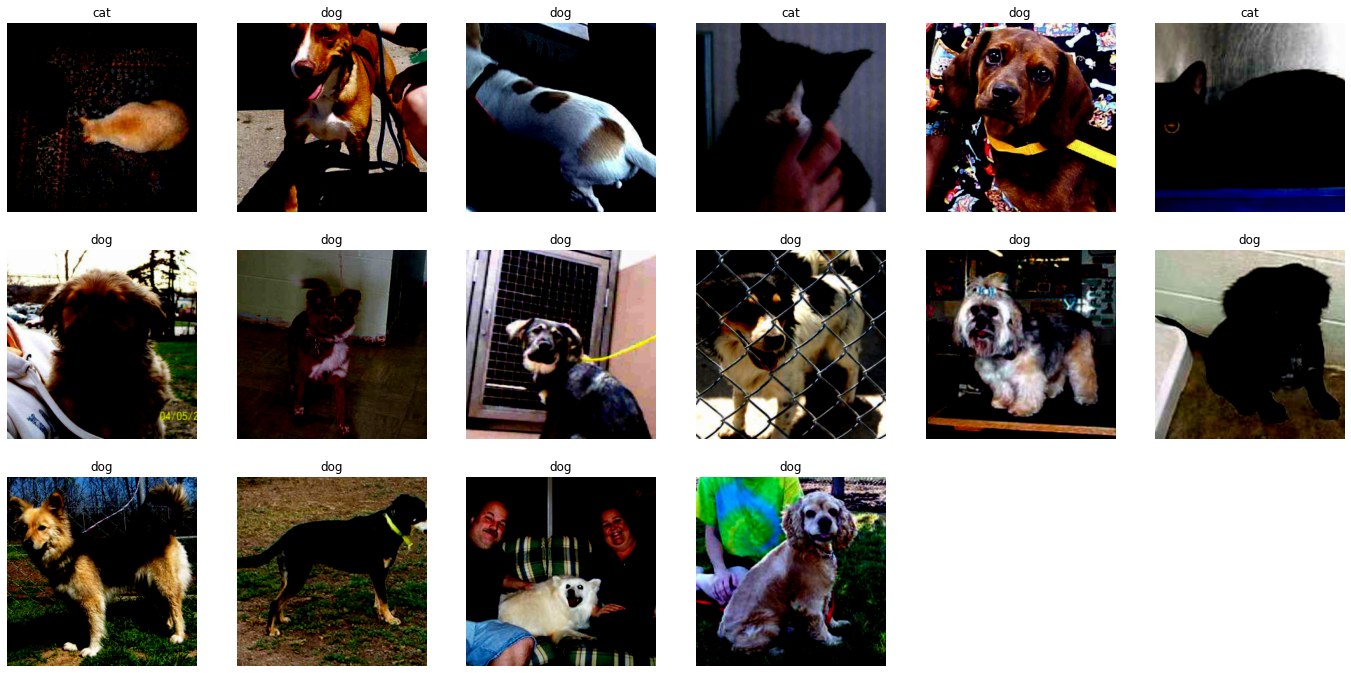

In [0]:
samples, labels = iter(train_loader).next()
samples = samples.to(device)
labels = labels.cpu().data.numpy()
fig = plt.figure(figsize=(24, 16))
fig.tight_layout()
ad = {0:'cat', 1:'dog'}
for num, sample in enumerate(samples[:24]):
    plt.subplot(4,6,num+1)
    plt.title(ad[labels[num]])
    plt.axis('off')
    sample = sample.cpu().numpy()
    plt.imshow(np.transpose(sample, (1,2,0)))

In [0]:
net = pretrainedmodels.inceptionresnetv2(pretrained=False).to(device)
net.last_linear = nn.Linear(1536, 2).to(device)

In [0]:
from tqdm import tqdm_notebook

def test(net, dataloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)

            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy: %d %%' % (100 * correct / total))

def train(net, dataloader, optimizer, criterion):
    for epoch in range(NB_EPOCH):
        running_loss = .0
        for i, data in enumerate(dataloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            if i%50 == 49:
                print('[%d, %5d] loss: %.9f' % (epoch+1, i+1, running_loss/50))
                running_loss = .0
        
        test(net, val_loader)

        PATH = './dogs_vs_cats/incresnetv2_%d.pth' % (epoch)
        torch.save(net.state_dict(), PATH)
                
    print('Finished training')

In [0]:
NB_EPOCH = 14

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 1e-3)

train(net, train_loader, optimizer, criterion)

[1,    50] loss: 0.536075674
[1,   100] loss: 0.553145944
[1,   150] loss: 0.520112563
[1,   200] loss: 0.540676483
[1,   250] loss: 0.557247020
[1,   300] loss: 0.528124447
[1,   350] loss: 0.501040156
[1,   400] loss: 0.548109249
[1,   450] loss: 0.539215899
[1,   500] loss: 0.547472290
[1,   550] loss: 0.520433354
[1,   600] loss: 0.498620426
[1,   650] loss: 0.522559884
[1,   700] loss: 0.523061536
[1,   750] loss: 0.488851704
[1,   800] loss: 0.496477056
[1,   850] loss: 0.481975434
[1,   900] loss: 0.514535854
[1,   950] loss: 0.542590993
[1,  1000] loss: 0.520756864
[1,  1050] loss: 0.457695356
[1,  1100] loss: 0.416475523
[1,  1150] loss: 0.516758531
[1,  1200] loss: 0.424632535
[1,  1250] loss: 0.480200910
Accuracy: 80 %
[2,    50] loss: 0.394590473
[2,   100] loss: 0.448723202
[2,   150] loss: 0.417177651
[2,   200] loss: 0.432839984
[2,   250] loss: 0.435990842
[2,   300] loss: 0.396526119
[2,   350] loss: 0.450634239
[2,   400] loss: 0.444632718
[2,   450] loss: 0.415593540

In [0]:
def predict(net, dataloader):
    predicted_list = []
    prob = nn.Softmax()
    
    with torch.no_grad():
        for data in tqdm(dataloader):
            images = data[0]
            images = images.to(device)
            
            outputs = net(images)
            outputs1 = prob(outputs)
            predicted_list.append(outputs1[:,1].cpu().data.numpy())
            
    return np.concatenate(predicted_list, axis=0)

In [0]:
predicted = predict(net, test_loader)

  0%|          | 0/782 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()
100%|██████████| 782/782 [02:43<00:00,  4.78it/s]


In [0]:
df = pd.read_csv('./sample_submission.csv', index_col='id')
for i, j in enumerate(test_img_dict):
    df.at[j, 'label'] = predicted[i]
df.to_csv('./dogs_vs_cats/feature_prediction.csv')

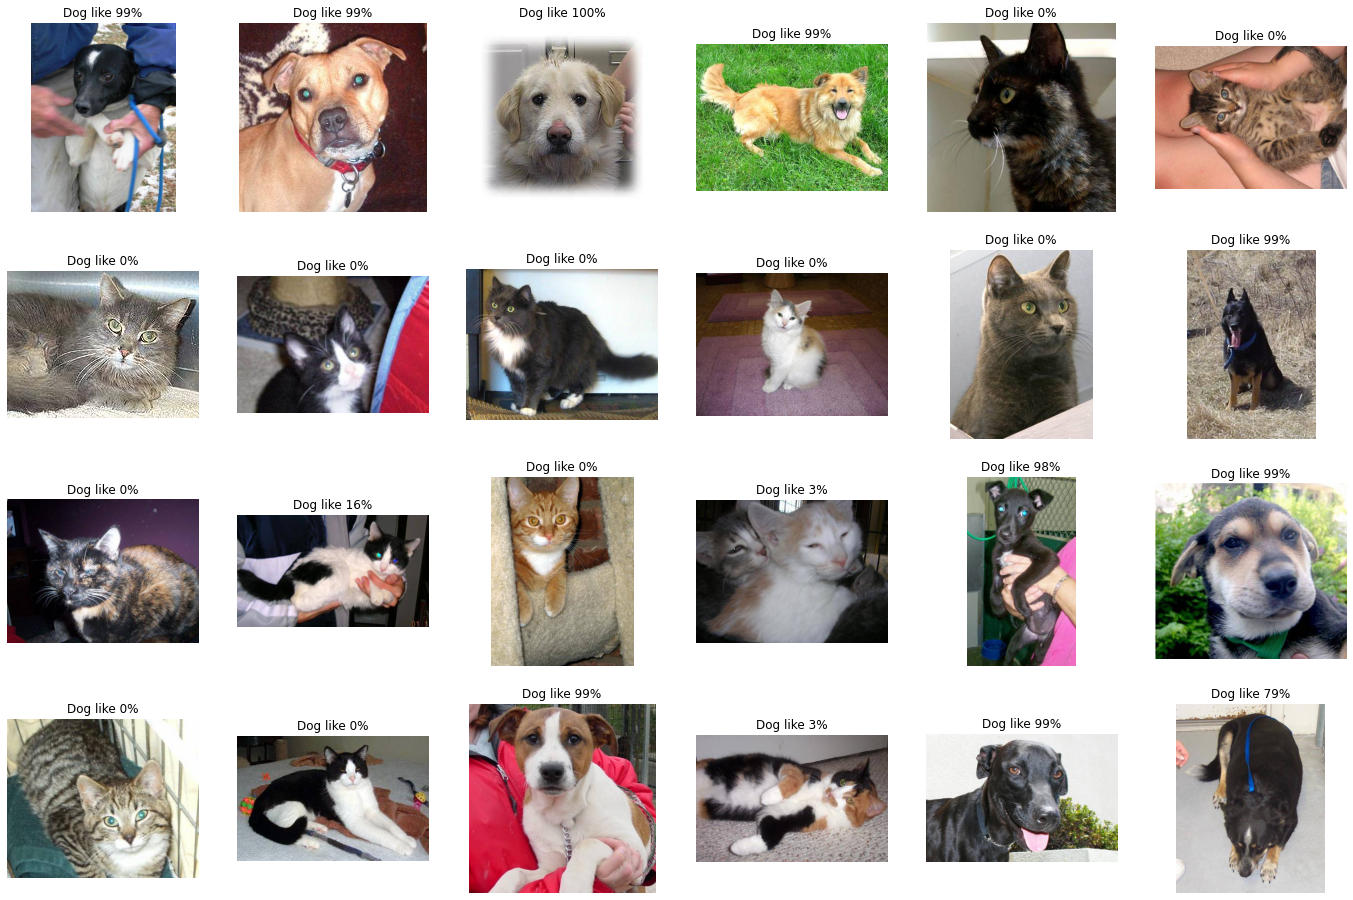

In [0]:
fig = plt.figure(figsize=(24, 16))
fig.tight_layout()
ad = {0:'cat', 1:'dog'}
for num, sample in enumerate(df.reset_index().id[:24]):
    plt.subplot(4,6,num+1)
    plt.title('Dog like %d%%' % (df.iloc[num][0] * 100))
    plt.axis('off')
    img = plt.imread(os.path.join('./dogs_vs_cats/test/test', str(sample) + '.jpg'))
    plt.imshow(img)